# 01.

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 02. Basic Algebra

## Subplots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [ ]:
# A figure with just one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

In [ ]:
# Stack vertically
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

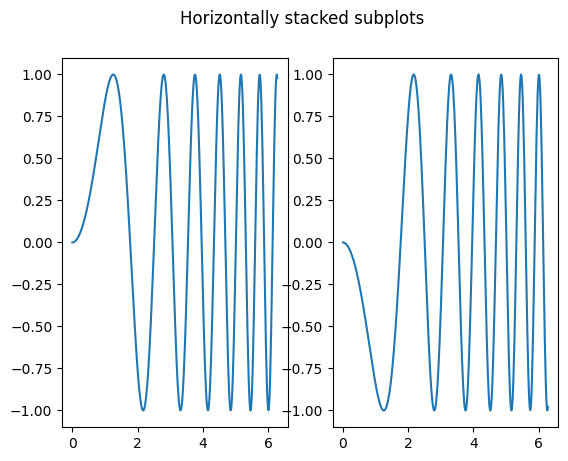

In [ ]:
# Stack horizontally
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

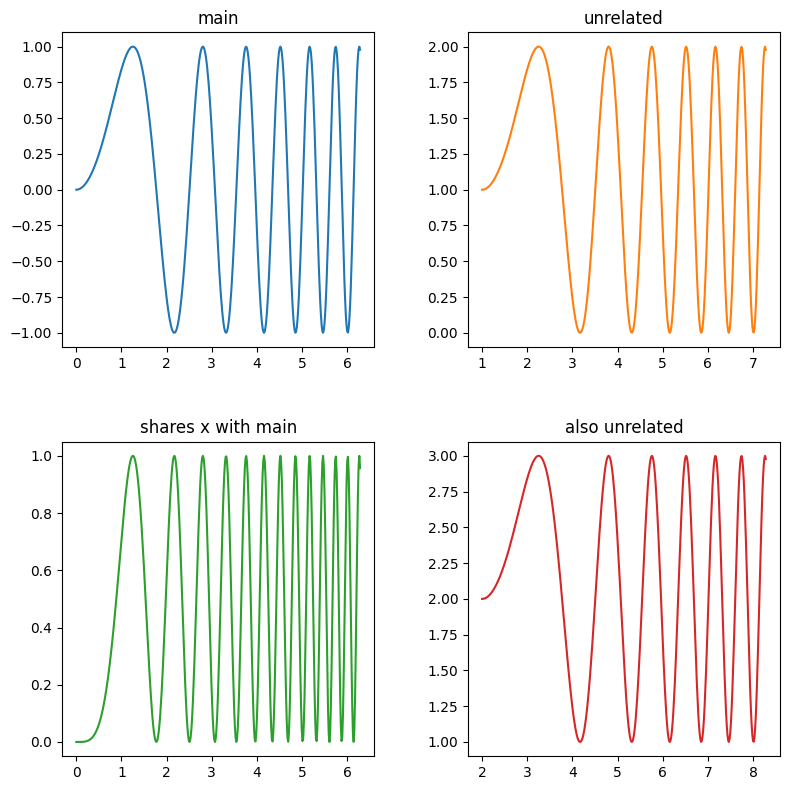

In [ ]:
# Stack horizontally and vertically 2
fig, axs = plt.subplots(2, 2, figsize=(4*2, 4*2))

axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")

axs[0, 1].plot(x + 1, y + 1, 'tab:orange')
axs[0, 1].set_title("unrelated")

axs[1, 0].plot(x, y**2, 'tab:green')
axs[1, 0].set_title("shares x with main")

axs[1, 1].plot(x + 2, y + 2, 'tab:red')
axs[1, 1].set_title("also unrelated")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.3) # after tight_layout

## The Mandelbrot Set

Inspired by this notebook, which is adapted from the numpy docs

In [ ]:
import time

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print ('%r (%r, %r) %2.2f sec' % (method.__name__, args, kw, te-ts))
        return result

    return timed

In [ ]:
# Fast plotting
import numpy as np
import matplotlib.pyplot as plt

@timeit
def mandelbrot(height, width, maxit=20):
    """Returns an image of the Mandelbrot fractal of size height x width."""
    y, x = np.ogrid[ -1.4:1.4:height*1j, -2:0.8:width*1j ]
    c = x+y * 1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime

ax, fig = plt.subplots(figsize=(10,10))
plt.imshow(mandelbrot(400, 400, 500))
plt.show()

In [ ]:
# Faster plotting
import numpy as np
import matplotlib.pyplot as plt

@timeit
def mandelbrot(h, w, maxit=20):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > 2                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = 2                          # avoid diverging too much

    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))

# Python

##### List of numbers

In [ ]:
# Create a list of 1000 numbers between -3 and 3
x = np.linspace(-3, 3, 1000)
y = np.vectorize(function)(x)

# Creates a list of 10 random integers between 1 and 100
random_numbers = [random.randint(1, 100) for _ in range(10)]

# Create 25 random floats [0-1]
random_floats = np.random.rand(25)

array([0.07835505, 0.36434352])

In [ ]:
# for loops
for _ in range(10):
    pass

##### timeit decorator, returns (res, t in msec)

In [ ]:
def timeit(func, return_result=False):
    """
    A decorator that measures the execution time of a function.

    Input: func (function): The function to be measured.
    Returns: function: A wrapper function that executes the given function and measures its execution time in milliseconds.
    """
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = 1000 * (end_time - start_time)
        if return_result:
            return result, total_time
        return total_time
    return timeit_wrapper

##### timeit_mean_msec decorator, return t in milliseconds

In [ ]:
from functools import wraps
import time

def timeit_mean_msec(n=100):
    """
    A decorator that measures the mean execution time of a function over n executions.

    Input: n (int): The number of times to execute the function. Defaults to 100.
    Returns: function: A wrapper function that executes the given function n times and measures its mean execution time in milliseconds.
    """
    def decorator(func):
        @wraps(func)
        def timeit_wrapper(*args, **kwargs):
            total_time = 0
            start_time = time.perf_counter()
            for _ in range(n):
                func(*args, **kwargs)
            end_time = time.perf_counter()
            total_time = end_time - start_time
            mean_time = (total_time / n) * 1000
            return mean_time
        return timeit_wrapper
    return decorator

##### apply a timeout to a function

In [ ]:
import signal

def execute_with_timeout(seconds):
    """Decorator that applies a timeout to the function"""

    def raise_timeout(signum, frame):
        raise Exception()

    def decorator(func):
        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, raise_timeout)
            signal.alarm(seconds)
            try:
                return func(*args, **kwargs)
            finally:
                signal.alarm(0)
        return wrapper
    return decorator

#### mathplotlib

(array([1., 2., 1., 1., 0., 1., 2., 0., 1., 1.]),
 array([36., 42., 48., 54., 60., 66., 72., 78., 84., 90., 96.]),
 <BarContainer object of 10 artists>)

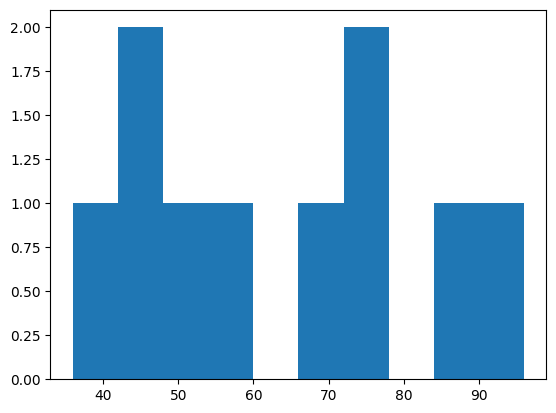

In [ ]:
# plot a histogram
random_numbers = [random.randint(1, 100) for _ in range(10)]
plt.hist(random_numbers, bins=10)

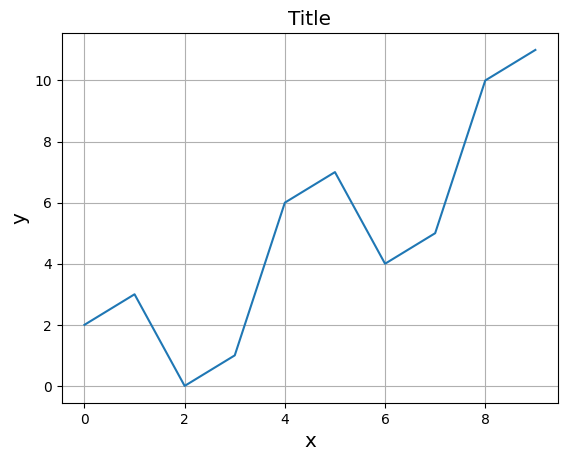

In [ ]:
# basic plot
x = np.arange(10)
y = x^2
plt.plot(x, y)
plt.xlabel("x", fontsize="x-large")
plt.ylabel("y", fontsize="x-large")
plt.title("Title", fontsize="x-large")
plt.grid()

# Pandas

## Datasets

### Open csv file

In [3]:
url = "https://raw.githubusercontent.com/MirkaIvanova/public_data/faa36a8bada292a70dc8cbb226fe58572e8d4bb4/netflix_titles.csv"

df = pd.read_csv(url)

### Dataframe operations

In [4]:
df.shape

type(df)

df1 = pd.read_csv(url, index_col = ["show_id"])
df1.index   # returns all rows, only the index column
df1.columns # returns the headers of all columns

df.drop(columns = ["show_id"]) # remove column, not inplace

df.release_year  # return specific column

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Plotting data from a dataframe

In [ ]:
# plot a histogram with 30 bins on one variable/column
plt.hist(df.release_year, bins=30)
plt.show()

# plot a histogram with exact number of bins
num_years = df.release_year.nunique()
plt.hist(df.release_year, bins=num_years)
plt.show()

# plot a bar chart
plt.figure(figsize = (10, 5))
year_values = df.release_year.value_counts().sort_index()
year_values.index # get the release years sorted asc
plt.bar(year_values.index, year_values)
plt.xlabel("Year")
plt.xlabel("Number of movies")
plt.show()

### Statistics

In [ ]:
df.release_year.min()

df.release_year.unique() # list all unique values from this column

df.release_year.nunique() # number of all unique values from this column
df.release_year.nunique(dropna = False) # do not drop n/a values

# count each value, order desc. Ex: number of movies per year
df.release_year.value_counts()

# arithmetic mean
df.release_year.mean()

# median of years
df.release_year.median()

# най-честата стойност, мода (not mode)
df.release_year.value_counts().mode().values

# variance-дисперсия (средното разстрояние на квадрат)
df.release_year.value_counts().var()

# standard deviation
df.release_year.value_counts().std()

# max number of movies per year
df.release_year.value_counts().max()

# max number of movies per year and show the year
(df.release_year.value_counts().max(), df.release_year.value_counts().idxmax())

# mean number of movies per year
df.release_year.value_counts().mean()


### Filtering of a dataframe

In [ ]:
df.release_year == 2020 #true/false for each row

df[df.release_year==2020] # take only the rows where the condition is true

sixties = df[(df.release_year >= 1960) & (df.release_year <= 1970)]
plt.hist(sixties.release_year, bins=10)
plt.show()

# operators: & | ~